In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
df_por = pd.read_pickle('./brazilstudents.pkl')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,student_performance
0,GP,F,18,U,GT3,A,4,4,course,mother,...,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,course,father,...,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,other,mother,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,home,mother,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,home,father,...,no,4,3,2,1,2,5,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,course,mother,...,no,5,4,2,1,2,5,4,10,1
645,MS,F,18,U,LE3,T,3,1,course,mother,...,no,4,3,4,1,1,1,4,16,2
646,MS,F,18,U,GT3,T,1,1,course,mother,...,no,1,1,1,1,1,5,6,9,0
647,MS,M,17,U,LE3,T,3,1,course,mother,...,no,2,4,5,3,4,2,6,10,1


In [3]:
df_por.drop(columns = ['G3'], inplace = True)

In [4]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'student_performance'],
      dtype='object')

In [5]:
num_cats = ['age', 'absences', 'failures' ] #Removed G3 for pipeline prediction reasons
nominal_cats = ['school', 'sex', 'address', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', ]
ordinal_cats = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'Medu', 'Fedu', 'studytime', 'traveltime']

In [6]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy= 'mean')), ('numnorm', StandardScaler())])

ordinal_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')), 
    ('ordnorm', StandardScaler())
    ])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')),
    ('onehotnorm', MaxAbsScaler())
])

In [7]:
ct = ColumnTransformer(
    [("ordinal_pipe", ordinal_pipeline, ordinal_cats),
    ("nominal_pipe", nominal_pipeline, nominal_cats),
    ("numeric_pipe", numeric_pipeline, num_cats)]
)

In [8]:
ct

ColumnTransformer(transformers=[('ordinal_pipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 ['famrel', 'freetime', 'goout', 'Dalc', 'Walc',
                                  'health', 'Medu', 'Fedu', 'studytime',
                                  'traveltime']),
                                ('nominal_pipe',
                                 Pipeline(steps=[('onehotimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                              

In [9]:
k_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', KNeighborsClassifier())
])


In [10]:
X = df_por.drop(columns = ['student_performance'])
y = df_por['student_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 305, stratify = y)

In [11]:
k_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [12]:
y_pred = k_pipe.predict(X_test)

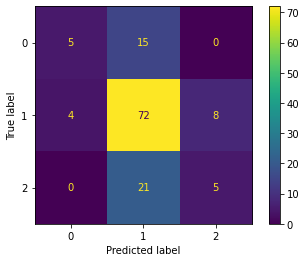

In [13]:
plot_confusion_matrix(k_pipe, X_test, y_test)

In [14]:
accuracy_score(y_test, y_pred)

0.6307692307692307

In [15]:
k_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__n_neighbors': np.arange(3, 25, 2),
                'model__p': [1, 2, 3, 4]
                }

In [16]:
gridsearch = GridSearchCV(estimator = k_pipe, param_grid= k_pipe_grid, scoring= 'roc_auc')

In [17]:
gridsearch.fit(X_train, y_train)

ValueError: multiclass format is not supported

In [ ]:
best_model = gridsearch.best_estimator_

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [ ]:
y_pred_k = best_model.predict(X_test)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


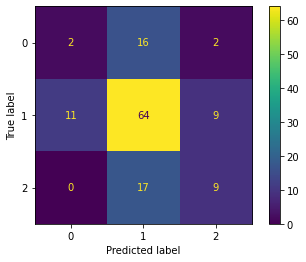

In [ ]:
plot_confusion_matrix(best_model,
                      X_test,
                      y_test)

In [18]:
naive_bayes_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', GaussianNB())
])


In [19]:
naive_bayes_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [20]:
y_pred_NB = naive_bayes_pipe.predict(X_test)

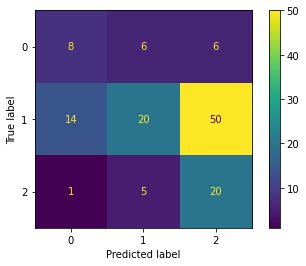

In [21]:
plot_confusion_matrix(naive_bayes_pipe, X_test, y_test)

In [22]:
dtree_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', DecisionTreeClassifier())
])


In [23]:
dtree_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal_pipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordnorm',
                                                                   StandardScaler())]),
                                                  ['famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'Medu', 'Fedu',
                                                   'studytime', 'traveltime']),
                                                 ('nominal_pipe',
                                                  Pipeline(steps=[('onehotimputer',
                                                                   SimpleImputer(strateg

In [24]:
y_pred_dtree = dtree_pipe.predict(X_test)

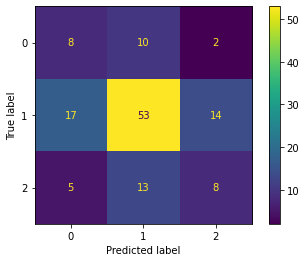

In [26]:
plot_confusion_matrix(dtree_pipe, X_test, y_test)

In [28]:
dtree_pipe_grid = {'preprocessing__numeric_pipe__numimputer__strategy': ['mean', 'median'], 
                'model__max_depth': np.arange(3, 25, 2),
                'model__min_samples_leaf': [2,3,4,5,6,7,8,9,10],
                'model__criterion': ['gini', 'entropy'],
                }

In [31]:
dtree_gridsearch = GridSearchCV(estimator = dtree_pipe, param_grid= dtree_pipe_grid, scoring= 'accuracy')

In [32]:
dtree_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal_pipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordnorm',
                                                                                          StandardScaler())]),
                                                                         ['famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                       

In [34]:
dtree_gridsearch.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 3,
 'model__min_samples_leaf': 2,
 'preprocessing__numeric_pipe__numimputer__strategy': 'mean'}

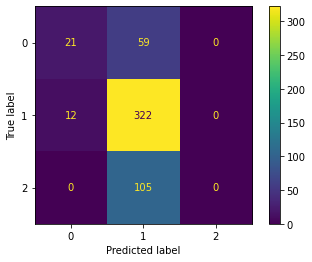

In [35]:
plot_confusion_matrix(dtree_gridsearch.best_estimator_, X_train, y_train)